In [1]:
! pip install chembl_webresource_client

In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [3]:
target = new_client.target
target_query = target.search('CHEMBL203')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,11.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,5.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
2,[],Homo sapiens,EGFR/PPP1CA,5.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,4.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
4,[],Homo sapiens,Epidermal growth factor receptor,3.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
5,[],Homo sapiens,VHL/EGFR,1.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,0.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


In [4]:
selected_target = targets.target_chembl_id[3]
selected_target

'CHEMBL2111431'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [6]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,210452,[],CHEMBL702407,In vitro efficacy (average) against HN5 (EGFR)...,F,None,None,BAO_0000190,BAO_0000019,assay format,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,None,None,CHEMBL1146682,Bioorg. Med. Chem. Lett.,2004,None,CHEMBL493428,None,CHEMBL493428,6.27,False,http://www.openphacts.org/units/Nanomolar,15411,=,1,True,=,None,IC50,nM,None,540.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.54
1,None,224588,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,BAO_0000224,protein format,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,None,None,CHEMBL1133627,J. Med. Chem.,2000,"{'bei': '12.10', 'le': '0.22', 'lle': '-0.78',...",CHEMBL109625,None,CHEMBL109625,4.21,False,http://www.openphacts.org/units/Nanomolar,208016,=,1,True,=,None,IC50,nM,None,62320.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,62.32
2,None,224592,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,BAO_0000224,protein format,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,None,None,CHEMBL1133627,J. Med. Chem.,2000,"{'bei': '15.26', 'le': '0.33', 'lle': '1.14', ...",CHEMBL112225,None,CHEMBL112225,6.08,False,http://www.openphacts.org/units/Nanomolar,208012,=,1,True,=,None,IC50,nM,None,840.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.84
3,None,225816,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,BAO_0000224,protein format,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,None,None,CHEMBL1133627,J. Med. Chem.,2000,"{'bei': '14.43', 'le': '0.31', 'lle': '0.81', ...",CHEMBL111307,None,CHEMBL111307,5.75,False,http://www.openphacts.org/units/Nanomolar,208043,=,1,True,=,None,IC50,nM,None,1790.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,1.79
4,None,228495,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,BAO_0000224,protein format,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,None,None,CHEMBL1133627,J. Med. Chem.,2000,"{'bei': '15.47', 'le': '0.33', 'lle': '0.97', ...",CHEMBL109212,None,CHEMBL109212,6.38,False,http://www.openphacts.org/units/Nanomolar,208061,=,1,True,=,None,IC50,nM,None,420.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Not Determined,1462468,[],CHEMBL835868,Inhibition of EGF-stimulated human umbilical v...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1ccc(Nc2ncnn3cccc23)cc1O,None,None,CHEMBL1138664,J. Med. Chem.,2004,None,CHEMBL185853,None,CHEMBL185853,None,False,None,378707,None,1,False,None,None,IC50,None,None,None,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,None,None,None
111,None,1462473,[],CHEMBL873337,Inhibition of EGF-stimulated human umbilical v...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1ccc(Nc2ncnn3ccc(C)

In [7]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [8]:
df.to_csv('bioactivity_data.csv', index=False)

In [9]:
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,210452,[],CHEMBL702407,In vitro efficacy (average) against HN5 (EGFR)...,F,None,None,BAO_0000190,BAO_0000019,assay format,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,None,None,CHEMBL1146682,Bioorg. Med. Chem. Lett.,2004,None,CHEMBL493428,None,CHEMBL493428,6.27,False,http://www.openphacts.org/units/Nanomolar,15411,=,1,True,=,None,IC50,nM,None,540.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.54
1,None,224588,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,BAO_0000224,protein format,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,None,None,CHEMBL1133627,J. Med. Chem.,2000,"{'bei': '12.10', 'le': '0.22', 'lle': '-0.78',...",CHEMBL109625,None,CHEMBL109625,4.21,False,http://www.openphacts.org/units/Nanomolar,208016,=,1,True,=,None,IC50,nM,None,62320.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,62.32
2,None,224592,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,BAO_0000224,protein format,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,None,None,CHEMBL1133627,J. Med. Chem.,2000,"{'bei': '15.26', 'le': '0.33', 'lle': '1.14', ...",CHEMBL112225,None,CHEMBL112225,6.08,False,http://www.openphacts.org/units/Nanomolar,208012,=,1,True,=,None,IC50,nM,None,840.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.84
3,None,225816,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,BAO_0000224,protein format,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,None,None,CHEMBL1133627,J. Med. Chem.,2000,"{'bei': '14.43', 'le': '0.31', 'lle': '0.81', ...",CHEMBL111307,None,CHEMBL111307,5.75,False,http://www.openphacts.org/units/Nanomolar,208043,=,1,True,=,None,IC50,nM,None,1790.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,1.79
4,None,228495,[],CHEMBL677877,Concentration needed to inhibit the autophosph...,B,None,None,BAO_0000190,BAO_0000224,protein format,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,None,None,CHEMBL1133627,J. Med. Chem.,2000,"{'bei': '15.47', 'le': '0.33', 'lle': '0.97', ...",CHEMBL109212,None,CHEMBL109212,6.38,False,http://www.openphacts.org/units/Nanomolar,208061,=,1,True,=,None,IC50,nM,None,420.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,None,1462337,[],CHEMBL873337,Inhibition of EGF-stimulated human umbilical v...,F,None,None,BAO_0000190,BAO_0000219,cell-based format,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,Outside typical range,Values for this activity type are unusually la...,CHEMBL1138664,J. Med. Chem.,2004,None,CHEMBL186080,None,CHEMBL186080,None,False,http://www.openphacts.org/units/Nanomolar,378684,=,1,True,=,None,IC50,nM,None,509000.0,CHEMBL2111431,Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,9606,None,None,IC50,uM,UO_0000065,None,509.0
109,None,1462342,[],CHEMBL873337,Inhibition of EGF-stimulated

In [10]:
bioactivity_class = []
for i in df2.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

Iterate the molecule_chembl_id to a list

In [11]:
mol_cid = []
for i in df2.molecule_chembl_id:
  mol_cid.append(i)

Iterate canonical_smiles to a list

In [12]:
canonical_smiles = []
for i in df2.canonical_smiles:
  canonical_smiles.append(i)

Iterate standard_value to a list



In [13]:
standard_value = []
for i in df2.standard_value:
  standard_value.append(i)

In [14]:
data_tuples = list(zip(mol_cid, canonical_smiles, bioactivity_class, standard_value))
df3 = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'standard_value'])
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,540.0
1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,62320.0
2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,840.0
3,CHEMBL111307,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,intermediate,1790.0
4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,420.0
...,...,...,...,...
106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,509000.0
107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,2500000.0
108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,270000.0
109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,644000.0


In [15]:
pd.concat([df3,pd.Series(bioactivity_class)], axis=1)

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,0
0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,540.0,active
1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,62320.0,inactive
2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,840.0,active
3,CHEMBL111307,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,intermediate,1790.0,intermediate
4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,420.0,active
...,...,...,...,...,...
106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,509000.0,inactive
107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,2500000.0,inactive
108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,270000.0,inactive
109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,644000.0,inactive


In [16]:
df3.to_csv('bioactivity_preprocessed_data.csv', index=False)

In [17]:
df = pd.read_csv('bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,540.0
1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,62320.0
2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,840.0
3,CHEMBL111307,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,intermediate,1790.0
4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,420.0
...,...,...,...,...
106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,509000.0
107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,2500000.0
108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,270000.0
109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,644000.0


In [18]:
df_no_smiles = df.drop(columns='canonical_smiles')

In [19]:
smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [20]:
df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,bioactivity_class,standard_value,canonical_smiles
0,CHEMBL493428,active,540.0,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...
1,CHEMBL109625,inactive,62320.0,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC
2,CHEMBL112225,active,840.0,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC
3,CHEMBL111307,intermediate,1790.0,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC
4,CHEMBL109212,active,420.0,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC
...,...,...,...,...
106,CHEMBL186080,inactive,509000.0,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1
107,CHEMBL184311,inactive,2500000.0,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12
108,CHEMBL188522,inactive,270000.0,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O
109,CHEMBL184750,inactive,644000.0,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1


**Calculate Lipinski descriptors**

Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the druglikeness of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the Rule-of-Five or Lipinski's Rule.

The Lipinski's Rule stated the following:

Molecular weight < 500

Dalton Octanol-water partition coefficient (LogP) < 5

Hydrogen bond donors < 5

Hydrogen bond acceptors < 10

**Installing rdkit**

rdkit

rdkit installation for lipinski descriptors

In [21]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [22]:
!mamba install -c conda-forge rdkit


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.8.0) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['rdkit']

pkgs/main/linux-64       [] (--:--) No change
pkgs/main/linux-64       [] (00m:00s) No ch

In [23]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [24]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [25]:
df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,562.671,4.70370,2.0,9.0
1,347.418,4.99068,1.0,5.0
2,398.260,4.93820,1.0,5.0
3,398.260,4.93820,1.0,5.0
4,412.287,5.40998,1.0,5.0
...,...,...,...,...
106,276.702,3.57382,1.0,4.0
107,276.702,3.57382,1.0,4.0
108,254.293,2.79534,2.0,5.0
109,254.293,2.79534,2.0,5.0


**Combine DataFrames**

In [26]:
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,562.671,4.70370,2.0,9.0
1,347.418,4.99068,1.0,5.0
2,398.260,4.93820,1.0,5.0
3,398.260,4.93820,1.0,5.0
4,412.287,5.40998,1.0,5.0
...,...,...,...,...
106,276.702,3.57382,1.0,4.0
107,276.702,3.57382,1.0,4.0
108,254.293,2.79534,2.0,5.0
109,254.293,2.79534,2.0,5.0


In [27]:
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,540.0
1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,62320.0
2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,840.0
3,CHEMBL111307,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,intermediate,1790.0
4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,420.0
...,...,...,...,...
106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,509000.0
107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,2500000.0
108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,270000.0
109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,644000.0


In [28]:
df_combined = pd.concat([df,df_lipinski], axis=1)
df_combined


,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,540.0,562.671,4.70370,2.0,9.0
1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,62320.0,347.418,4.99068,1.0,5.0
2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,840.0,398.260,4.93820,1.0,5.0
3,CHEMBL111307,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,intermediate,1790.0,398.260,4.93820,1.0,5.0
4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,420.0,412.287,5.40998,1.0,5.0
...,...,...,...,...,...,...,...,...
106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,509000.0,276.702,3.57382,1.0,4.0
107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,2500000.0,276.702,3.57382,1.0,4.0
108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,270000.0,254.293,2.79534,2.0,5.0
109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,644000.0,254.293,2.79534,2.0,5.0


**Convert IC50 to pIC50**

To allow IC50 data to be more uniformly distributed, we will convert IC50 to the negative logarithmic scale which is essentially -log10(IC50).

This custom function pIC50() will accept a DataFrame as input and will:

Take the IC50 values from the standard_value column and converts it from nM to M by multiplying the value by 10 −9  Take the molar value and apply -log10 Delete the standard_value column and create a new pIC50 column

In [29]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [30]:
df_combined.standard_value.describe()

count    1.110000e+02
mean     5.800591e+04
std      2.559810e+05
min      1.100000e+01
25%      6.600000e+02
50%      3.300000e+03
75%      1.459000e+04
max      2.500000e+06
Name: standard_value, dtype: float64

In [31]:
-np.log10( (10**-9)* 100000000 )

1.0

In [32]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,562.671,4.70370,2.0,9.0,540.0
1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,347.418,4.99068,1.0,5.0,62320.0
2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,398.260,4.93820,1.0,5.0,840.0
3,CHEMBL111307,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,intermediate,398.260,4.93820,1.0,5.0,1790.0
4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,412.287,5.40998,1.0,5.0,420.0
...,...,...,...,...,...,...,...,...
106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,276.702,3.57382,1.0,4.0,509000.0
107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,276.702,3.57382,1.0,4.0,2500000.0
108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,254.293,2.79534,2.0,5.0,270000.0
109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,254.293,2.79534,2.0,5.0,644000.0


In [33]:
df_norm.standard_value_norm.describe()

count    1.110000e+02
mean     5.800591e+04
std      2.559810e+05
min      1.100000e+01
25%      6.600000e+02
50%      3.300000e+03
75%      1.459000e+04
max      2.500000e+06
Name: standard_value_norm, dtype: float64

In [34]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,562.671,4.70370,2.0,9.0,6.267606
1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,347.418,4.99068,1.0,5.0,4.205373
2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,398.260,4.93820,1.0,5.0,6.075721
3,CHEMBL111307,COc1cc2ncc(C#N)c(Nc3ccc(C)c(Br)c3)c2cc1OC,intermediate,398.260,4.93820,1.0,5.0,5.747147
4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,412.287,5.40998,1.0,5.0,6.376751
...,...,...,...,...,...,...,...,...
106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,276.702,3.57382,1.0,4.0,3.293282
107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,276.702,3.57382,1.0,4.0,2.602060
108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,254.293,2.79534,2.0,5.0,3.568636
109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,254.293,2.79534,2.0,5.0,3.191114


In [35]:
df_final.pIC50.describe()

count    111.000000
mean       5.464303
std        1.074671
min        2.602060
25%        4.836116
50%        5.481486
75%        6.181255
max        7.958607
Name: pIC50, dtype: float64

In [36]:
df_final.to_csv('cetuximab_bioactivity_data_class_pIC50.csv')

**Removing the 'intermediate' bioactivity class**

In [37]:
df_2class = df_final[df_final['bioactivity_class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,562.671,4.70370,2.0,9.0,6.267606
1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,347.418,4.99068,1.0,5.0,4.205373
2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,398.260,4.93820,1.0,5.0,6.075721
4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,412.287,5.40998,1.0,5.0,6.376751
5,CHEMBL111520,COc1cc2ncc(C#N)c(Nc3cccc([N+](=O)[O-])c3)c2cc1OC,active,350.334,3.77548,1.0,7.0,6.060481
...,...,...,...,...,...,...,...,...
106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,276.702,3.57382,1.0,4.0,3.293282
107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,276.702,3.57382,1.0,4.0,2.602060
108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,254.293,2.79534,2.0,5.0,3.568636
109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,254.293,2.79534,2.0,5.0,3.191114


In [38]:
df_2class.to_csv('cetuximab_bioactivity_data_2class_pIC50.csv')

**Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [39]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

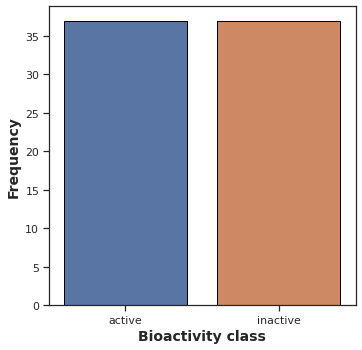

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_cet_bioactivity_class.pdf')

**Scatter plot of MW versus LogP It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.**

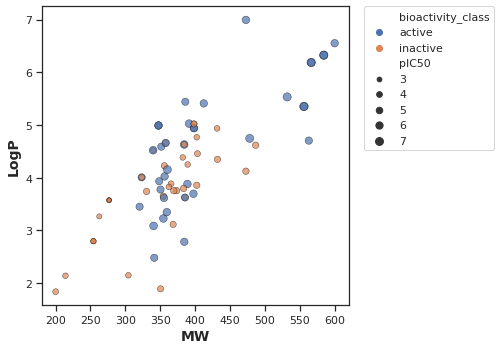

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

**Box plots pIC50 value**

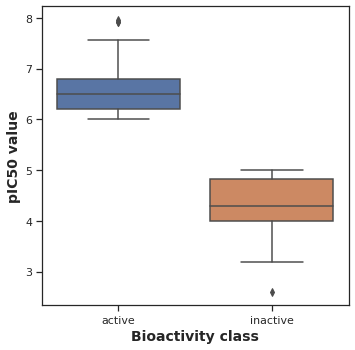

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [43]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df['bioactivity_class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df['bioactivity_class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results
  

In [44]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,6.915828e-14,0.05,Different distribution (reject H0)


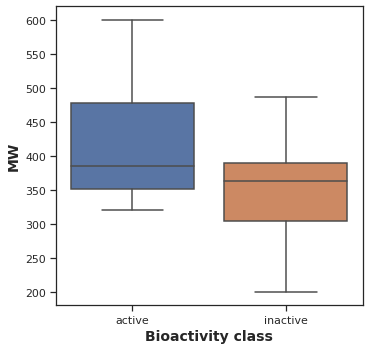

In [45]:
#Molecular weight
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

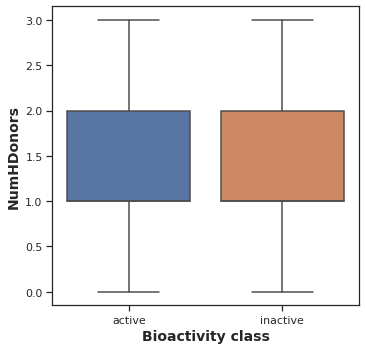

In [46]:
#NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [47]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,463.5,0.005959,0.05,Different distribution (reject H0)


In [74]:
#PaDEL-Descriptor
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2021-05-12 10:37:38--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2021-05-12 10:37:39--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.2’

padel.zip.2         100%[===================>]  24.57M  61.6MB/s    in 0.4s    

2021-05-12 10:37:39 (61.6 MB/s) - ‘padel.zip.2’ saved [25768637/25768637]

--2021-05-12 10:37:39--  https

In [75]:
! unzip padel.zip

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [76]:
#Load bioactivity data
import pandas as pd
df3 = pd.read_csv('cetuximab_bioactivity_data_2class_pIC50.csv')
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL493428,CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4c...,active,562.671,4.70370,2.0,9.0,6.267606
1,1,CHEMBL109625,COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC,inactive,347.418,4.99068,1.0,5.0,4.205373
2,2,CHEMBL112225,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC,active,398.260,4.93820,1.0,5.0,6.075721
3,4,CHEMBL109212,CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC,active,412.287,5.40998,1.0,5.0,6.376751
4,5,CHEMBL111520,COc1cc2ncc(C#N)c(Nc3cccc([N+](=O)[O-])c3)c2cc1OC,active,350.334,3.77548,1.0,7.0,6.060481
...,...,...,...,...,...,...,...,...,...
69,106,CHEMBL186080,Cc1cc2c(Nc3ccc(F)c(Cl)c3)ncnn2c1,inactive,276.702,3.57382,1.0,4.0,3.293282
70,107,CHEMBL184311,Cc1ccc2c(Nc3ccc(F)c(Cl)c3)ncnn12,inactive,276.702,3.57382,1.0,4.0,2.602060
71,108,CHEMBL188522,Cc1ccc(Nc2ncnn3ccc(C)c23)cc1O,inactive,254.293,2.79534,2.0,5.0,3.568636
72,109,CHEMBL184750,Cc1cc2c(Nc3ccc(C)c(O)c3)ncnn2c1,inactive,254.293,2.79534,2.0,5.0,3.191114


In [51]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [52]:
! cat molecule.smi | head -5

CS(=O)(=O)CCNCCCCOc1ccc2ncnc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c2c1	CHEMBL493428
COc1cc2ncc(C#N)c(Nc3cccc(C(C)C)c3)c2cc1OC	CHEMBL109625
COc1cc2ncc(C#N)c(Nc3cccc(Br)c3C)c2cc1OC	CHEMBL112225
CCOc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1OCC	CHEMBL109212
COc1cc2ncc(C#N)c(Nc3cccc([N+](=O)[O-])c3)c2cc1OC	CHEMBL111520


In [53]:
! cat molecule.smi | wc -l

74


Calculate fingerprint descriptors

Calculate PaDEL descriptors

In [54]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [55]:
! bash padel.sh

Processing CHEMBL493428 in molecule.smi (1/74). 
Processing CHEMBL109625 in molecule.smi (2/74). 
Processing CHEMBL109212 in molecule.smi (4/74). Average speed: 1.55 s/mol.
Processing CHEMBL112225 in molecule.smi (3/74). Average speed: 2.70 s/mol.
Processing CHEMBL111520 in molecule.smi (5/74). Average speed: 1.17 s/mol.
Processing CHEMBL326445 in molecule.smi (6/74). Average speed: 0.97 s/mol.
Processing CHEMBL1203088 in molecule.smi (7/74). Average speed: 0.83 s/mol.
Processing CHEMBL111038 in molecule.smi (8/74). Average speed: 0.75 s/mol.
Processing CHEMBL111664 in molecule.smi (9/74). Average speed: 0.70 s/mol.
Processing CHEMBL111443 in molecule.smi (10/74). Average speed: 0.63 s/mol.
Processing CHEMBL324045 in molecule.smi (11/74). Average speed: 0.61 s/mol.
Processing CHEMBL439596 in molecule.smi (12/74). Average speed: 0.56 s/mol.
Processing CHEMBL111586 in molecule.smi (13/74). Average speed: 0.56 s/mol.
Processing CHEMBL1203047 in molecule.smi (14/74). Average speed: 0.51 s/

In [56]:
ls -l

total 50864
-rw-r--r-- 1 root root    62429 May 12 10:26 bioactivity_data.csv
-rw-r--r-- 1 root root     8496 May 12 10:26 bioactivity_preprocessed_data.csv
-rw-r--r-- 1 root root     9613 May 12 10:26 cetuximab_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root   142972 May 12 10:21 cetuximab_bioactivity_data_3class_pIC50_pubchem_fp.csv
-rw-r--r-- 1 root root    14745 May 12 10:26 cetuximab_bioactivity_data_class_pIC50.csv
-rw-r--r-- 1 root root    14745 May 12 10:08 cetuxima_bioactivity_data_class_pIC50.csv
-rw-r--r-- 1 root root   142843 May 12 10:35 descriptors_output.csv
drwxr-xr-x 3 root root     4096 May 12 10:15 __MACOSX/
-rw-r--r-- 1 root root      129 May 12 10:26 mannwhitneyu_NumHAcceptors.csv
-rw-r--r-- 1 root root      120 May 12 10:26 mannwhitneyu_pIC50.csv
-rw-r--r-- 1 root root     4329 May 12 10:34 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor/
-rw-r--r-- 1 root root      231 May 12 10:15 padel.sh
-rw-r--r-- 1 root root      231 May 1

Preparing the X and Y Data Matrices

X data matrix

In [77]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Y variable

Convert IC50 to pIC50¶

In [58]:
df3_Y = df3['pIC50']
df3_Y

0     6.267606
1     4.205373
2     6.075721
3     6.376751
4     6.060481
        ...   
69    3.293282
70    2.602060
71    3.568636
72    3.191114
73    3.995679
Name: pIC50, Length: 74, dtype: float64

Combining X and Y variable

In [78]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.267606
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.205373
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.075721
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.376751
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.060481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.293282
70,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.602060
71,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.568636
72,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.191114


In [79]:
dataset3.to_csv('cetuximab_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [81]:
df = pd.read_csv('cetuximab_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.267606
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.205373
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.075721
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.376751
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6.060481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.293282
70,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.602060
71,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.568636
72,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.191114


In [82]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
70,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
71,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
72,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [83]:
Y = df.pIC50
Y

0     6.267606
1     4.205373
2     6.075721
3     6.376751
4     6.060481
        ...   
69    3.293282
70    2.602060
71    3.568636
72    3.191114
73    3.995679
Name: pIC50, Length: 74, dtype: float64

In [84]:
X.shape

(74, 881)

In [85]:
Y.shape

(74,)

In [67]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [68]:
#Data split (80/20 ratio)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
X_train.shape, Y_train.shape

((59, 173), (59,))

In [69]:
#Building a Regression Model using Random Forest
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

-0.14415811983446303

In [70]:
Y_pred = model.predict(X_test)

**Scatter Plot**

Experimental vs Predicted pIC50 Values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

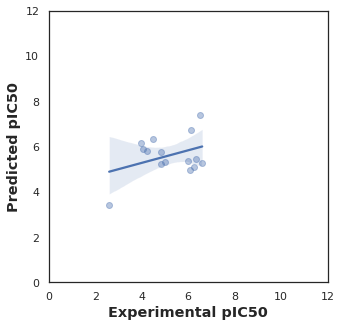

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

**Comparing Regressors**

In [72]:
! pip install lazypredict

In [86]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [87]:
df = pd.read_csv('cetuximab_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [88]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

**Data pre-processing**



In [89]:
X.shape, Y.shape

((74, 881), (74,))

In [90]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(74, 173)

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

**Compare ML algorithms**

In [92]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:00<00:00, 148910.20it/s]


In [93]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,9.48,-15.81,5.55,0.04
Lars,2.48,-1.94,2.32,0.14
DummyRegressor,1.50,0.00,1.35,0.02
LassoLars,1.50,0.00,1.35,0.05
Lasso,1.50,0.00,1.35,0.03
ElasticNet,1.45,0.12,1.27,0.02
LarsCV,1.34,0.34,1.10,0.49
LassoLarsIC,1.29,0.42,1.03,0.04
KNeighborsRegressor,1.26,0.48,0.98,0.02


[(0.0, 1.0)]

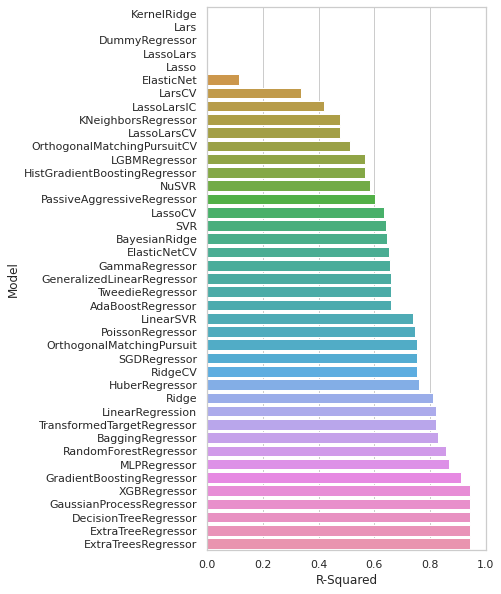

In [95]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

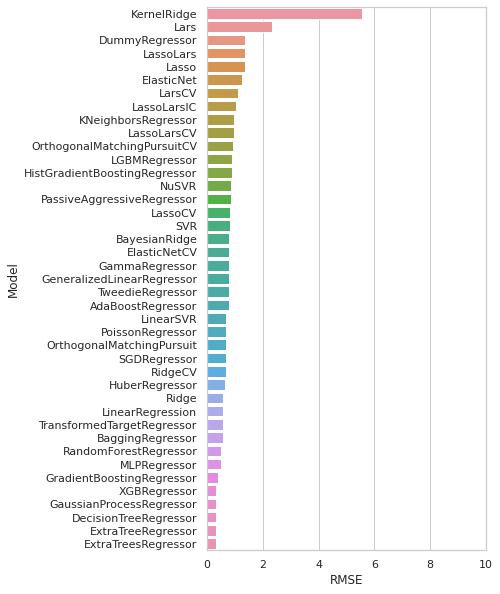

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

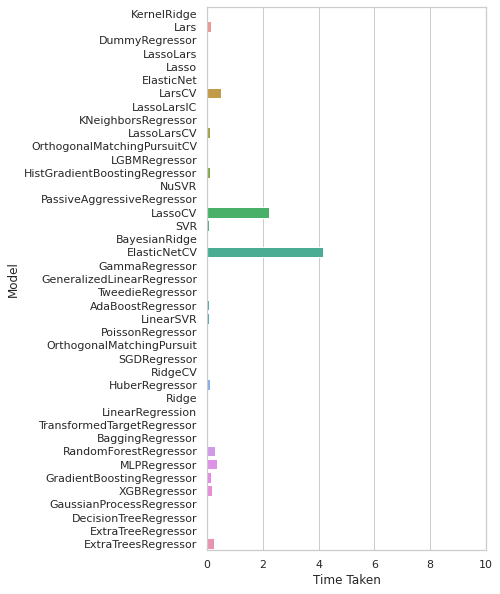

In [97]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))